K-Means algorithm. Please note that I have reused some of my old code from CSE 6040.

In [1]:
import numpy as np
import time

In [2]:
#   Randomly selects k points from the input image
def init_centers(X, k):

    centers = np.random.choice(len(X),k,replace=False)
#     centers = np.random.choice(len(X),1,replace=False)
#     return X[np.repeat(centers,k),:]
    return X[centers,:]

In [3]:
# Compute Euclidean distance
def compute_d2(X, centers):

    m = len(X)
    s=len(centers)
    
    S = np.empty((m,s))
    for i in range(m):
        S[i,:] = np.linalg.norm(X[i,:]-centers,ord=2,axis=1)**2
    
    return S

In [4]:
def assign_cluster_labels(S):
    return np.argmin(S,axis=1)

In [5]:
def update_centers(X, y):
    # X[:m, :d] == m points, each of dimension d
    # y[:m] == cluster labels
    m, d = X.shape
    k = max(y) + 1
    assert m == len(y)
    assert (min(y) >= 0)
    
    centers = np.empty((k, d))
    for j in range(k):
        # Compute the new center of cluster j,
        # i.e., centers[j, :d].
        centers[j,:] = np.mean(X[j==y],axis=0)
    return centers

In [6]:
# Calculate the within clusters sum of squares
def WCSS(S):
    return np.sum(np.amin(S,axis=1))

In [7]:
# The algorithm has converged if there is no change in the cluster centers in the next iteration
def has_converged(old_centers, centers):
    return set([tuple(x) for x in old_centers]) == set([tuple(x) for x in centers])

In [8]:
def kmeans(X, k,starting_centers=None,max_steps=np.inf):
    start = time.time()
    
    if starting_centers is None:
        centers = init_centers(X, k)
    else:
        centers = starting_centers
        
    converged = False
    labels = np.zeros(len(X))
    i = 1
    while (not converged) and (i <= max_steps):
        old_centers = centers
        S = compute_d2(X, old_centers)
        labels = assign_cluster_labels(S)
        centers = update_centers(X, labels)
        wc = WCSS(S)
        
        converged = has_converged(old_centers,centers)
        print ("iteration", i, "WCSS = ", WCSS (S))
        i += 1
    stop = time.time()
    print("Time taken = {:.2f} seconds".format(stop-start))
    return labels

In [9]:
from matplotlib.pyplot import imshow
%matplotlib inline
def display_image(arr):
    """
    display the image
    input : 3 dimensional array
    """
    arr = arr.astype(dtype='uint8')
    img = Image.fromarray(arr, 'RGB')
    imshow(np.asarray(img))

In [10]:
from PIL import Image
def read_img(path):
    """
    Read image and store it as an array, given the image path. 
    Returns the 3 dimensional image array.
    """
    img = Image.open(path)
    img_arr = np.array(img, dtype='int32')
    img.close()
    return img_arr


In [11]:
def runKMeansAlgorithm(pixels,k):
    print("Running k-means algorithm...")
#   Read image
    image = read_img(pixels)
    r, c, l = image.shape
#   Flatten image
    img_reshaped = np.reshape(image, (r*c, l), order="C")
#   Run k-means algorithm
    labels = kmeans(img_reshaped, k, starting_centers=None)
    ind = np.column_stack((img_reshaped, labels))
    centers = {}
    for i in set(labels):
        c = ind[ind[:,3] == i].mean(axis=0)
        centers[i] = c[:3]
        
    img_clustered = np.array([centers[i] for i in labels])
    r, c, l = image.shape
    img_disp = np.reshape(img_clustered, (r, c, l), order="C")
    
    print('Image with k = ' + str(k) + " clusters...")
    display_image(img_disp)
    print("The labels are: {}".format(labels.T))
    print("The cluster centers are {}".format(centers))
    return labels,centers

Running k-means algorithm...
iteration 1 WCSS =  2585840211.0
iteration 2 WCSS =  1213137181.956356
iteration 3 WCSS =  1003167454.6808009
iteration 4 WCSS =  893699668.1564072
iteration 5 WCSS =  789934790.9594418
iteration 6 WCSS =  711208271.1229628
iteration 7 WCSS =  671104827.0948277
iteration 8 WCSS =  651615496.2957407
iteration 9 WCSS =  642322967.0260947
iteration 10 WCSS =  637839455.2474364
iteration 11 WCSS =  635826396.9592894
iteration 12 WCSS =  634929038.2576686
iteration 13 WCSS =  634509549.7719651
iteration 14 WCSS =  634330678.226584
iteration 15 WCSS =  634245535.7436106
iteration 16 WCSS =  634202223.7363502
iteration 17 WCSS =  634184098.2028902
iteration 18 WCSS =  634177717.3350294
iteration 19 WCSS =  634175173.9163531
iteration 20 WCSS =  634174162.4782989
iteration 21 WCSS =  634173849.4039152
iteration 22 WCSS =  634173783.6050607
iteration 23 WCSS =  634173765.0770522
iteration 24 WCSS =  634173757.2158959
iteration 25 WCSS =  634173755.2966354
iteration 

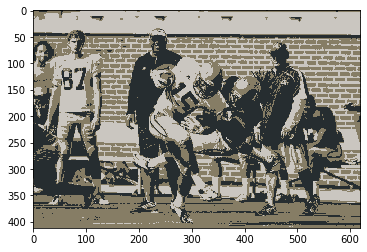

In [12]:
lab, cen = runKMeansAlgorithm("data/football.bmp",3)

Running k-means algorithm...
iteration 1 WCSS =  389599008.0
iteration 2 WCSS =  194633966.26500764
iteration 3 WCSS =  158409209.34289968
iteration 4 WCSS =  148831373.6483631
iteration 5 WCSS =  143824610.22942817
iteration 6 WCSS =  139707579.16874346
iteration 7 WCSS =  137296156.4037293
iteration 8 WCSS =  135397899.4588457
iteration 9 WCSS =  133925560.75748907
iteration 10 WCSS =  132690377.51961173
iteration 11 WCSS =  131667817.91402242
iteration 12 WCSS =  130892740.08558576
iteration 13 WCSS =  130364212.98891617
iteration 14 WCSS =  129992012.59922427
iteration 15 WCSS =  129693213.8722543
iteration 16 WCSS =  129440147.52493048
iteration 17 WCSS =  129184506.98292685
iteration 18 WCSS =  128887669.48954152
iteration 19 WCSS =  128557986.11477509
iteration 20 WCSS =  128212061.16508226
iteration 21 WCSS =  127908373.72405538
iteration 22 WCSS =  127675522.41787711
iteration 23 WCSS =  127514064.77921885
iteration 24 WCSS =  127381072.11134267
iteration 25 WCSS =  127296917.

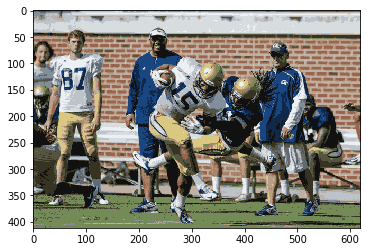

In [37]:
lab, cen = runKMeansAlgorithm("data/football.bmp",16)

Running k-means algorithm...
iteration 1 WCSS =  154156513.0
iteration 2 WCSS =  90854426.99404576
iteration 3 WCSS =  82374936.18956882
iteration 4 WCSS =  78979555.4186059
iteration 5 WCSS =  76874969.7167158
iteration 6 WCSS =  75376297.9050194
iteration 7 WCSS =  74181937.53857802
iteration 8 WCSS =  73510089.71580961
iteration 9 WCSS =  73042821.19014058
iteration 10 WCSS =  72611144.12092553
iteration 11 WCSS =  72173924.06588945
iteration 12 WCSS =  71681196.24227656
iteration 13 WCSS =  71134192.82620926
iteration 14 WCSS =  70540873.17103964
iteration 15 WCSS =  69924895.59256424
iteration 16 WCSS =  69313949.72028396
iteration 17 WCSS =  68802180.49051738
iteration 18 WCSS =  68392598.33023295
iteration 19 WCSS =  68090924.64142045
iteration 20 WCSS =  67890058.1555307
iteration 21 WCSS =  67739501.48248678
iteration 22 WCSS =  67606630.3922924
iteration 23 WCSS =  67473454.12835175
iteration 24 WCSS =  67355732.49085784
iteration 25 WCSS =  67255161.68398519
iteration 26 WCS

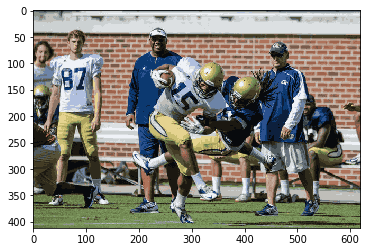

In [38]:
lab, cen = runKMeansAlgorithm("data/football.bmp",32)

Running k-means algorithm...
iteration 1 WCSS =  404111557.0
iteration 2 WCSS =  185068009.59071818
iteration 3 WCSS =  170311286.1525032
iteration 4 WCSS =  169676642.10593435
iteration 5 WCSS =  169657307.86373463
iteration 6 WCSS =  169656916.80336154
iteration 7 WCSS =  169656891.6555998
iteration 8 WCSS =  169656890.81534788
Time taken = 18.93 seconds
Image with k = 2 clusters...
The labels are: [1 1 1 ... 0 0 0]
The cluster centers are {0: array([92.84412979, 80.94779891, 56.73093098]), 1: array([168.57808098, 186.45381739, 193.0552757 ])}


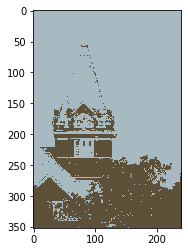

In [39]:
lab, cen = runKMeansAlgorithm("data/TechTower.jpg",2)

Running k-means algorithm...
iteration 1 WCSS =  78081187.0
iteration 2 WCSS =  38936409.903284445
iteration 3 WCSS =  31357584.93121798
iteration 4 WCSS =  29227598.9107575
iteration 5 WCSS =  28650936.17738529
iteration 6 WCSS =  28411226.065431207
iteration 7 WCSS =  28192688.736099314
iteration 8 WCSS =  27965000.435471594
iteration 9 WCSS =  27583585.606403805
iteration 10 WCSS =  26785410.072711565
iteration 11 WCSS =  26346085.22983884
iteration 12 WCSS =  26048507.612918265
iteration 13 WCSS =  25797227.60573025
iteration 14 WCSS =  25566364.945790816
iteration 15 WCSS =  25338954.926837184
iteration 16 WCSS =  25118219.123322424
iteration 17 WCSS =  24830252.30974612
iteration 18 WCSS =  24360939.59759022
iteration 19 WCSS =  23748258.6143158
iteration 20 WCSS =  23169536.275939815
iteration 21 WCSS =  22679166.139020912
iteration 22 WCSS =  22317896.191743504
iteration 23 WCSS =  22025442.517010275
iteration 24 WCSS =  21802724.609557293
iteration 25 WCSS =  21624312.16271823

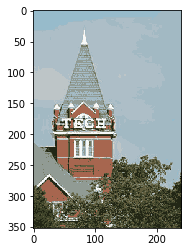

In [40]:
lab, cen = runKMeansAlgorithm("data/TechTower.jpg",12)

Running k-means algorithm...
iteration 1 WCSS =  45019968.0
iteration 2 WCSS =  27767575.689218067
iteration 3 WCSS =  23898738.075360753
iteration 4 WCSS =  22352898.928599153
iteration 5 WCSS =  21484255.380953792
iteration 6 WCSS =  20815592.421394795
iteration 7 WCSS =  20220248.45025015
iteration 8 WCSS =  19626269.678854804
iteration 9 WCSS =  19087538.242243454
iteration 10 WCSS =  18596517.368090734
iteration 11 WCSS =  18083614.717021115
iteration 12 WCSS =  17596459.88655153
iteration 13 WCSS =  17157083.371140227
iteration 14 WCSS =  16711904.483522398
iteration 15 WCSS =  16296609.056771155
iteration 16 WCSS =  15964166.881750261
iteration 17 WCSS =  15709637.325473953
iteration 18 WCSS =  15471680.80901358
iteration 19 WCSS =  15204757.67213304
iteration 20 WCSS =  14880927.562267441
iteration 21 WCSS =  14500658.953930428
iteration 22 WCSS =  14194685.86238497
iteration 23 WCSS =  13976880.939191196
iteration 24 WCSS =  13838267.36840708
iteration 25 WCSS =  13738525.5303

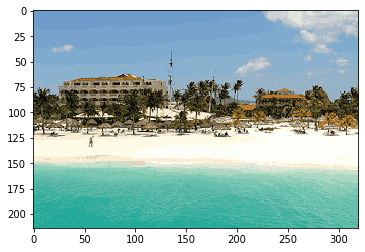

In [54]:
lab, cen = runKMeansAlgorithm("data/beach.bmp",32)